# **IRIS FLOWER CLASSIFICATION**
By Samuel Lunghe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the iris dataset from Google Drive
data_path = '/content/drive/MyDrive/ColabNotebooks/CODSOFT_DataScience/IRIS FLOWER CLASSIFICATION/iris.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
import pandas as pd

def check_missing_values(df):
    """
    This function checks for missing values in the DataFrame.
    :param df: pandas DataFrame
    """
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("No missing values in the dataset.")
    else:
        print("Missing values in each column:")
        print(missing_values)
# Check for missing values
check_missing_values(data)


No missing values in the dataset.


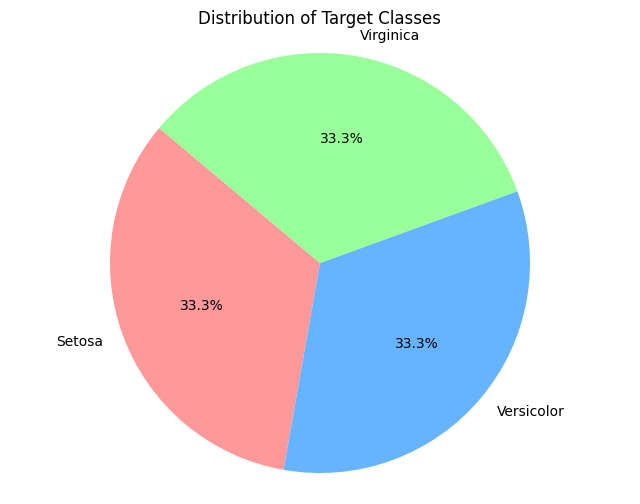

In [ ]:
import matplotlib.pyplot as plt

def plot_target_distribution(df, target_column):
    """
    This function creates a pie plot of the target column in the DataFrame.
    :param df: pandas DataFrame
    :param target_column: string, the name of the target column
    """
    # Count the occurrences of each class in the target column
    target_counts = df[target_column].value_counts()

    # Create a pie plot
    plt.figure(figsize=(8, 6))
    plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
    plt.title('Distribution of Target Classes')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plot the target distribution
plot_target_distribution(data, 'variety')


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'variety' column
data['variety'] = label_encoder.fit_transform(data['variety'])

# Display the first few rows of the dataset after label encoding
print("\nDataFrame after Label Encoding:")
data.head()



DataFrame after Label Encoding:


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = data.drop('variety', axis=1)
y = data['variety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the classifiers
classifiers = {
    'k-NN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': GaussianNB()
}

# DataFrame to store evaluation results
results = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Evaluate each classifier
for name, clf in classifiers.items():
    # Create a pipeline with a standard scaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the results to the DataFrame
    result = pd.DataFrame([[name, accuracy, precision, recall, f1]],
                          columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    results = pd.concat([results, result], ignore_index=True)



In [ ]:
results

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,k-NN,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000,1.000000
3,SVM,1.000000,1.000000,1.000000,1.000000
4,Logistic Regression,1.000000,1.000000,1.000000,1.000000
5,Naive Bayes,0.977778,0.979365,0.977778,0.977745
